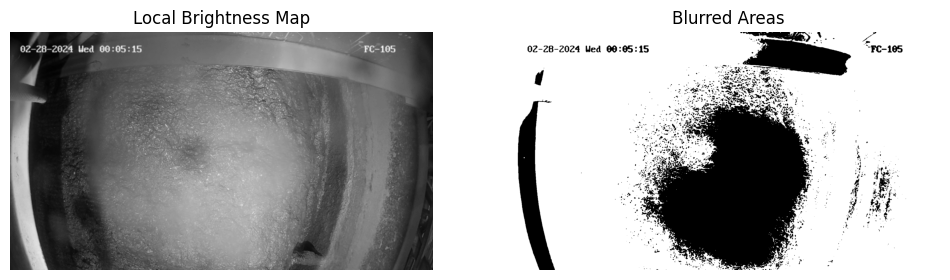

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функция для расчета локальной яркости
def local_brightness(image, window_size=5):
    """
    Рассчитывает локальную яркость в каждом окне изображения.
    window_size - размер окна для оценки локальной яркости (например, 5x5)
    """
    # Применение фильтра для расчета среднего значения яркости в каждом окне
    local_brightness_map = cv2.blur(image, (window_size, window_size))
    return local_brightness_map

# Загрузка изображения в оттенках серого
image = cv2.imread('/Users/solyanikvarvara/Desktop/misis_chill/new_photos/cv_open_dataset/open_img/1709046334_0.jpg', cv2.IMREAD_GRAYSCALE)

# Рассчитываем локальную яркость
local_brightness_map = local_brightness(image, window_size=5)

# Определяем порог для классификации размытых и четких областей
# Порог можно выбрать опытным путем или на основе статистики (например, среднее или медиана)
threshold = np.percentile(local_brightness_map, 75)  # 25-й перцентиль

# Создание маски для размытых областей
blurred_mask = local_brightness_map < threshold

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Отображаем карту локальной яркости
axes[0].imshow(local_brightness_map, cmap='gray')
axes[0].set_title('Local Brightness Map')
axes[0].axis('off')  # Отключаем оси

# Отображаем маску размытых областей
axes[1].imshow(blurred_mask * 255, cmap='gray')
axes[1].set_title('Blurred Areas')
axes[1].axis('off')  # Отключаем оси

plt.show()